In [1]:
# Importing Packages

import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
from keras import regularizers

import pandas as pd 
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)

import seaborn as sns 
sns.set_style('darkgrid')

# Preprocessing the Data

In [3]:
# Directory Path

train_data_dir = 'Data/train/'
test_data_dir = 'Data/test/'

In [4]:
# Getting all the data 

test_generator = ImageDataGenerator().flow_from_directory(
                test_data_dir, 
                target_size = (224, 224), 
                batch_size = 624)

train_generator = ImageDataGenerator().flow_from_directory(
                  train_data_dir, 
                  target_size = (224, 224), 
                  batch_size = 5216)

# Creating the datasets

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

# Unrowing Images for the MLP

train_img_unrow = train_images.reshape(5216,-1)
display(train_img_unrow.shape)

test_img_unrow = test_images.reshape(624,-1)
display(test_img_unrow.shape)


# Normalizing Image Data

train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255

Found 624 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


(5216, 150528)

(624, 150528)

In [8]:
# Preprocessing our Labels

display(train_labels)

display(train_generator.class_indices)
display(test_generator.class_indices)

train_labels_final = train_labels[:,1].reshape(-1,1)
display(np.shape(train_labels_final))

test_labels_final = test_labels[:,1].reshape(-1,1)
display(np.shape(test_labels_final))

{'NORMAL': 0, 'PNEUMONIA': 1}

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
# Confirming size, shape and type of datasets

display(np.shape(train_images))
display(type(train_images))

print('-------------')

display(np.shape(train_labels))
display(type(train_labels)

print('-------------')

display(np.shape(test_images))
display(type(test_images))
        
print('-------------')

display(np.shape(test_labels))
display(type(test_labels))

# EDA

In [ ]:
plt.figure()
plt.imshow(train_images[4994:5000], cmap = 'gray')
plt.title(train_labels[4994:5000])

In [ ]:
plt.figure()
plt.imshow(test_images[494:500], cmap = 'gray')
plt.title(test_labels[494:500])

In [ ]:
plt.figure()
sns.barplot(x = [sum(train_labels == 0), sum(train_labels == 1)],
            y = ['Normal', 'Pneumonia'])
plt.title('Class Imbalance: Training Data')
plt.ylabel('Class')
plt.xlabel('Number of Training Images')
plt.show()

In [ ]:
plt.figure()
sns.barplot(x = [sum(test_labels == 0), sum(test_labels == 1)],
            y = ['Normal', 'Pneumonia'])
plt.title('Class Imbalance: Test Data')
plt.ylabel('Class')
plt.xlabel('Number of Training Images')
plt.show()

# Baseline model (Multi Layer Perceptron)

In [11]:
# Defining the Baseline MLP Model

model_1 = Sequential()

model_1.add(Dense(32, activation = 'relu', input_shape=(150528,)))

model_1.add(Dense(64, activation = 'relu'))

model_1.add(Dense(96, activation = 'relu'))

model_1.add(Dense(128, activation = 'relu'))

model_1.add(Dense(1, activation = 'sigmoid'))

2021-11-15 11:44:20.475997: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Compiling the Model

model_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['binary_accuracy'])

In [13]:
# Reviewing the Model

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                4816928   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 96)                6240      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               12416     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 4,837,825
Trainable params: 4,837,825
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Training the Baseline MLP and Saving its history

results_1 = model_1.fit(train_img_final, 
                        train_labels_final,
                        verbose = 2,
                        epochs = 100, 
                        batch_size = 32,
                        validation_data = (test_img_final, test_labels_final))

Epoch 1/100


2021-11-15 11:44:20.752624: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


163/163 - 4s - loss: 0.4724 - binary_accuracy: 0.8418 - val_loss: 0.4448 - val_binary_accuracy: 0.7901
Epoch 2/100
163/163 - 4s - loss: 0.2950 - binary_accuracy: 0.8875 - val_loss: 0.4643 - val_binary_accuracy: 0.7981
Epoch 3/100
163/163 - 4s - loss: 0.2199 - binary_accuracy: 0.9130 - val_loss: 0.7135 - val_binary_accuracy: 0.7452
Epoch 4/100
163/163 - 3s - loss: 0.2273 - binary_accuracy: 0.9187 - val_loss: 1.4432 - val_binary_accuracy: 0.6667
Epoch 5/100
163/163 - 3s - loss: 0.2335 - binary_accuracy: 0.9225 - val_loss: 0.6109 - val_binary_accuracy: 0.6731
Epoch 6/100
163/163 - 3s - loss: 0.2163 - binary_accuracy: 0.9241 - val_loss: 0.7007 - val_binary_accuracy: 0.7580
Epoch 7/100
163/163 - 3s - loss: 0.1970 - binary_accuracy: 0.9273 - val_loss: 0.5108 - val_binary_accuracy: 0.7821
Epoch 8/100
163/163 - 3s - loss: 0.1903 - binary_accuracy: 0.9300 - val_loss: 0.5425 - val_binary_accuracy: 0.7708
Epoch 9/100
163/163 - 3s - loss: 0.1668 - binary_accuracy: 0.9425 - val_loss: 0.9464 - val_b

Epoch 72/100
163/163 - 3s - loss: 0.0759 - binary_accuracy: 0.9728 - val_loss: 1.0816 - val_binary_accuracy: 0.7580
Epoch 73/100
163/163 - 3s - loss: 0.0880 - binary_accuracy: 0.9697 - val_loss: 1.5110 - val_binary_accuracy: 0.7163
Epoch 74/100
163/163 - 3s - loss: 0.0726 - binary_accuracy: 0.9747 - val_loss: 0.8011 - val_binary_accuracy: 0.7869
Epoch 75/100
163/163 - 4s - loss: 0.2482 - binary_accuracy: 0.9323 - val_loss: 1.0606 - val_binary_accuracy: 0.7388
Epoch 76/100
163/163 - 3s - loss: 0.0733 - binary_accuracy: 0.9749 - val_loss: 0.9393 - val_binary_accuracy: 0.7740
Epoch 77/100
163/163 - 3s - loss: 0.0745 - binary_accuracy: 0.9739 - val_loss: 1.4389 - val_binary_accuracy: 0.7292
Epoch 78/100
163/163 - 3s - loss: 0.0673 - binary_accuracy: 0.9776 - val_loss: 1.5118 - val_binary_accuracy: 0.7244
Epoch 79/100
163/163 - 3s - loss: 0.2617 - binary_accuracy: 0.9298 - val_loss: 0.8138 - val_binary_accuracy: 0.7500
Epoch 80/100
163/163 - 4s - loss: 0.0897 - binary_accuracy: 0.9703 - val

In [28]:
# Visualizing our Loss/Accuracy Curves, Classification Report, Confusion Matrices and Evaluating the Performance

def visualize_training_results(results, model, test_img_final, test_labels_final):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['Val_Loss', 'Loss'])
    plt.title('Binary Crossentropy Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    print('\n')
    print('\n')
    
    plt.figure()
    plt.plot(history['val_binary_accuracy'])
    plt.plot(history['binary_accuracy'])
    plt.legend(['Val_Binary_Accuracy', 'Binary_Accuracy'])
    plt.title('Binary Classification Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    print('\n')
    print('\n')
       
    y_hat_test = model.predict(test_img_final)
    thresh = 0.5
    y_pred = (y_hat_test > thresh).astype(np.int)
    y_true = test_labels_final.astype(np.int)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='0.5g')
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix')
    plt.show()
    print('\n')
    print('\n')

    print(classification_report(y_true, y_pred))
    print('\n')
    print('\n')
    
    print('Evaluating the Performance')
    print('\n')
    test_score = model.evaluate(test_img_final, test_labels_final, verbose = 0)
    print(f'Test Loss: {test_score[0]}')
    print('\n')
    print(f'Test Accuracy: {test_score[1]}')

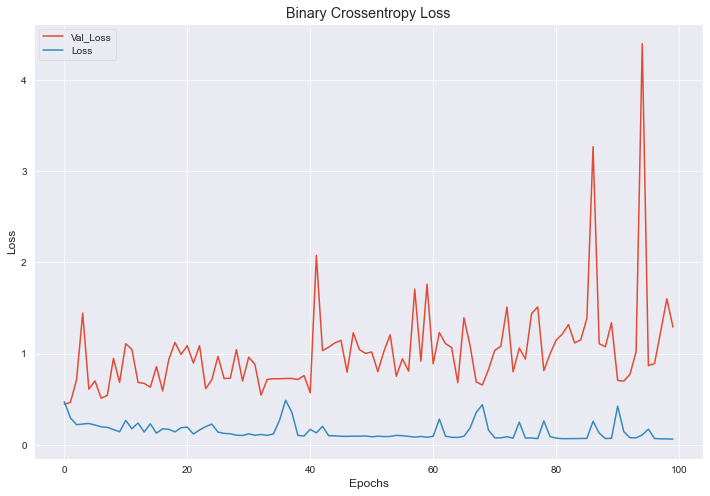

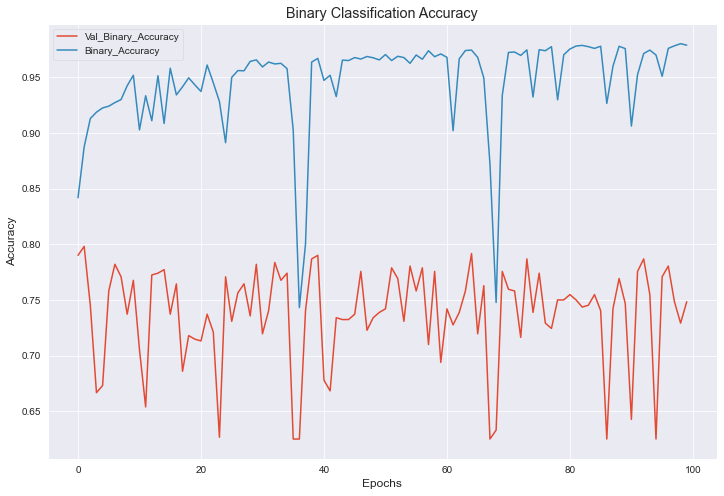

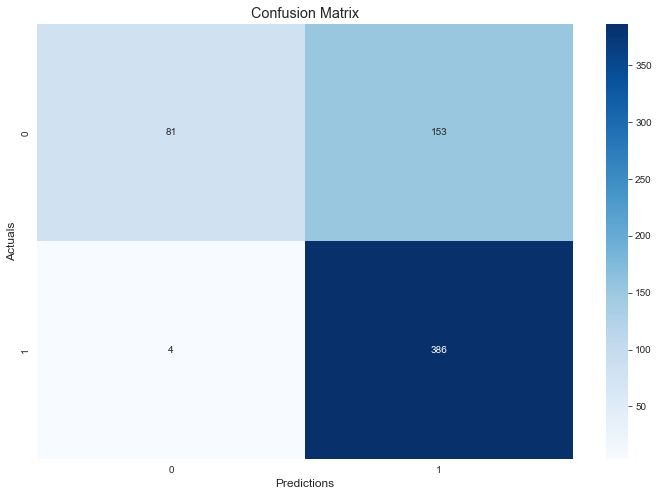





              precision    recall  f1-score   support

           0       0.95      0.35      0.51       234
           1       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.83      0.67      0.67       624
weighted avg       0.80      0.75      0.71       624





Evaluating the Performance
Test Loss: 1.2907962799072266
Test Accuracy: 0.7483974099159241


In [29]:
visualize_training_results(results_1, model_1, test_img_final, test_labels_final)

In [30]:
# Saving the Model

model_1.save('baseline_model.h5')

In [31]:
# Saving the Model Weights

model_1.save_weights('baseline_model_weights.h5')

# MLP Model Summary:

* The best accuracy the MLP model could achieve was about 75%. 


* The confusion matrix shows that it is mostly predicting that there is pneumonia, when pneumonia is actually present in the X-Ray. 


* The instability in the model can be seen in the loss and accuracy curves. We can see the instability in the variance of the curves on both graphs ranging from 5.00 to 25.00 %, at certain points without subsiding. This can be seen with the divergence of both curves beyond 20 Epochs. The training data almost reachs perfection, while the testing data fails to improve. 


* The model is overfitting, quite a bit. We can see around Epoch 20 on the Binary Accuracy graph that the model doesn't not improve. 


* This model could be improved/tuned by using differnet activation functions, trying different optimizers, including early stopping and different degrees of dropouts.  